**Detect Traffic Signs with Deep Learning**

In [ ]:
# Instalacion de dependencias
!pip install numpy #arreglos
!pip install matplotlib #graficar
!pip install tensorflow # IA


**Cargamos las imagenes y las mostramos**


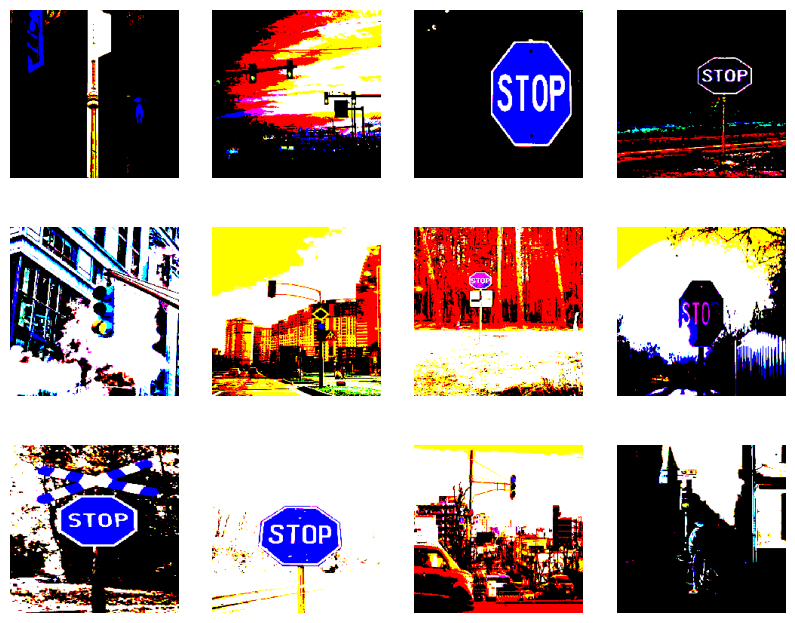

In [ ]:
# Importa las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras # redes neuronales

# Carga las imágenes
image, labels = np.load('batch.npy', allow_pickle=True).tolist()

# Hiperparámetros
input_size = image.shape[1]  # Dimensión de la imagen de entrada
num_classes = labels['classifier_head'].shape[1]  # Número de clases
DROPOUT_FACTOR = 0.2  # Probabilidad de dropout -- evitar el sobreajuste

# Muestra las primeras 12 imágenes
fig, axs = plt.subplots(3, 4, figsize=(10, 8))  # crea una cuadrícula de 3 filas y 4 columnas para mostrar las imágenes
axs = axs.flatten()  # convierte el arreglo de ejes en una lista plana

for i in range(12):
    axs[i].imshow(image[i])  # muestra la imagen en el índice i
    axs[i].axis("off")  # desactiva los ejes de la imagen

plt.show()  # muestra la cuadrícula de imágenes

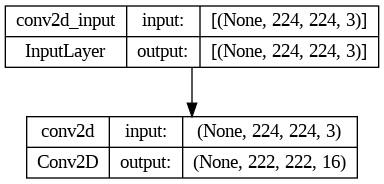

In [ ]:
from tensorflow.keras.utils import plot_model

# Creación del modelo secuencial
model = keras.Sequential()

# Adición de la capa de convolución
model.add(keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 3)))

# Visualización del modelo
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


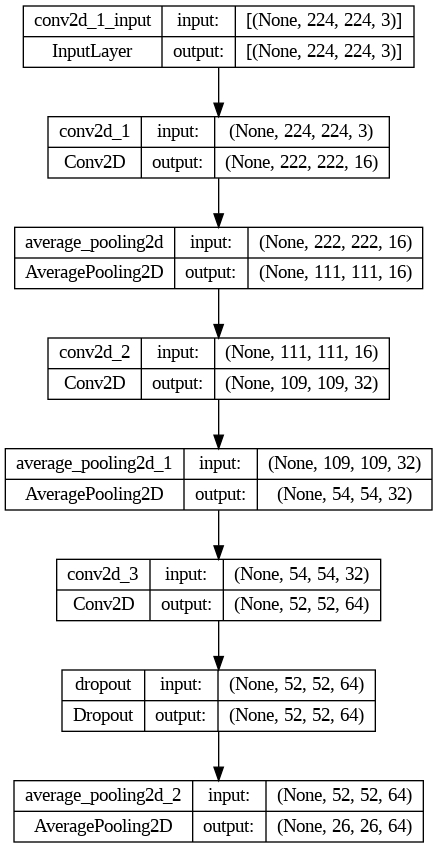

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dropout

# Creación del modelo secuencial
model = Sequential()

# Adición de la primera capa de convolución
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(input_size, input_size, 3)))

# Adición de la capa de agrupación
model.add(AveragePooling2D(2, 2))

# Adición de la segunda capa de convolución
model.add(Conv2D(32, kernel_size=3, activation='relu'))

# Adición de otra capa de agrupación
model.add(AveragePooling2D(2, 2))

# Adición de la tercera capa de convolución
model.add(Conv2D(64, kernel_size=3, activation='relu'))

# Adición de una capa de dropout para evitar el sobreajuste
model.add(Dropout(DROPOUT_FACTOR))

# Adición de otra capa de agrupación
model.add(AveragePooling2D(2, 2))

# Visualización del modelo
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
# Se comienza agregando una capa plana para convertir las características 3D a un vector de características 1D
model.add(keras.layers.Flatten())

# Ahora se procede a agregar al modelo la capa densa o la capa de procesamiento de los datos con 64 neuronas y activación ReLu
model.add(keras.layers.Dense(64, activation='relu'))

In [ ]:
# Capa densa con 64 neuronas y activación ReLu
model.add(keras.layers.Dense(64, activation='relu'))

# Ahora se procede a agregar una capa de salida con neuronas "num_classes" y activación softmax, representando las probabilidades de clase
model.add(keras.layers.Dense(num_classes, activation='softmax', name='classifier_head'))

In [ ]:
# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Variable para el entrenamiento del modelo
history = model.fit(image, labels['classifier_head'], epochs=20)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 2.9835 - accuracy: 0.5833
Epoch 2/20
1/1 [==============================] - 1s 802ms/step - loss: 190.0834 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 1s 834ms/step - loss: 42.1446 - accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 461ms/step - loss: 38.7268 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 409ms/step - loss: 33.6007 - accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 400ms/step - loss: 12.9542 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 488ms/step - loss: 0.2287 - accuracy: 0.9167
Epoch 8/20
1/1 [==============================] - 0s 458ms/step - loss: 2.3302 - accuracy: 0.8333
Epoch 9/20
1/1 [==============================] - 0s 475ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 461ms/step - loss: 3.3367e-04 - accuracy: 1.0000
Epoch 11/20


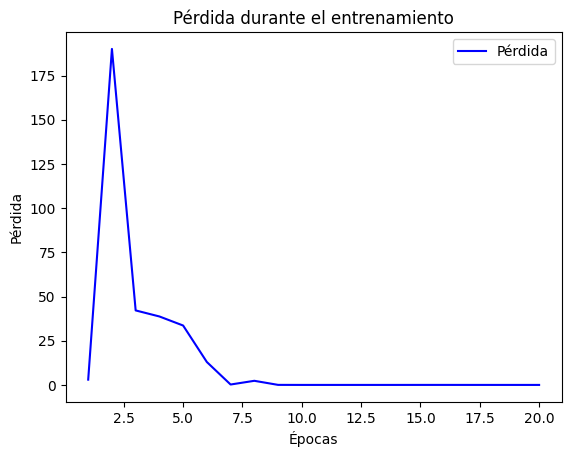

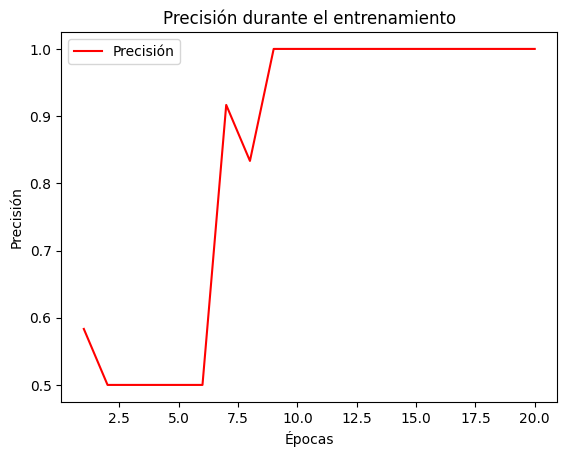

In [ ]:
import matplotlib.pyplot as plt

# Obtener la pérdida y la precisión del historial de entrenamiento
loss = history.history['loss']
accuracy = history.history['accuracy']

# Obtener el número de épocas
epochs = range(1, len(loss) + 1)

# Graficar la pérdida
plt.plot(epochs, loss, 'b', label='Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(epochs, accuracy, 'r', label='Precisión')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


In [ ]:
# Se imprime la precisión del entrenamiento, almacenando en una variable
accuracy = history.history['accuracy'][-1]
print(f"Training accuracy: {accuracy}")

Training accuracy: 1.0
